<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/CodeExamples/stats/coin_tosses_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# the animations work for me on Ubuntu
from scipy.stats import beta, binom
from matplotlib import animation

# initializing plot
def init_plot():
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 1), ylim=(0, 13))
    line, = ax.plot([], [], lw=2)
    #legend
    ttl = ax.text(0.6, 0.8,'',
                  transform = ax.transAxes, va='center', size=20)
    ax.set_xlabel("p")
    ax.set_ylabel("probability density")
    return fig, ax, ttl, line

# random variates
samples = binom.rvs(1, 0.5, size=1000)
#print(samples)
# starting parameters and x values
h = 1
t = 1
x = np.linspace(0.0, 1, 100)

# init function
def init():
    ttl.set_text("$\\alpha= " + str(h) + ", \\beta=" + str(t) + "$")
    y =  beta.pdf(x, h, t)
    line.set_data(x, y)
    return line,

# animating the stuff
def animate(i):
    global h, t
    # somehow the init frame is not drawn, so a small hack here
    if i != 0:
        h += samples[i-1]
        t += 1 - samples[i-1]
    ttl.set_text(f"H= {str(h)}, T= {str(t)}")
    y =  beta.pdf(x, h, t)
    line.set_ydata(y)
    return line,

In [38]:

#init_plot()
#init()

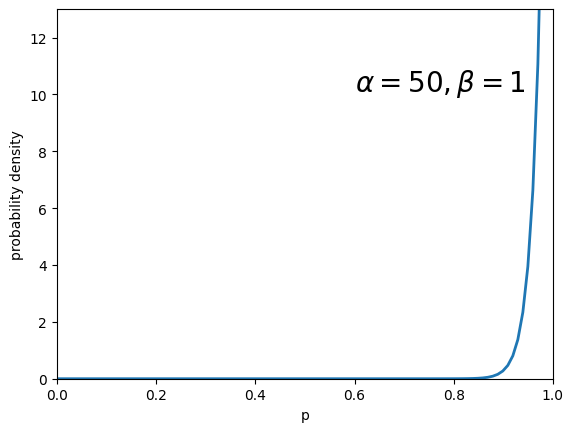

In [50]:
h,t = 50,1
fig, ax, ttl, line = init_plot()
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=300, blit=True)


In [51]:
# let's animate
# you can increase/decrease the FPS at the beginning of this notebook

from IPython.display import HTML
HTML(anim.to_html5_video())